In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.iolib.summary2 import summary_col

from linearmodels import (BetweenOLS, 
                          FirstDifferenceOLS, 
                          PooledOLS,PanelOLS,
                          RandomEffects)

# clean data

## load data

In [2]:
# DV1 female labor force participation rate. generally more consistent  > measure long term

# DV2 female unemployment rate. can be fluctuate, > measure short term

# DV3 gender gap in lfpr

# DV4 gender gap in unemployment rate


# female
flfpr = pd.read_csv('fem_lfpr_25-54.csv')
funemp = pd.read_csv('fem_unemp_25-54.csv')

# male
mlfpr = pd.read_csv('men_lfpr_25-54.csv')
munemp = pd.read_csv('men_unemp_25-54.csv')

# main IV family benefits
fambnf = pd.read_csv('family benefits.csv')

# fertility
fer = pd.read_csv('fertility.csv')

# gender inequality
ineq = pd.read_csv('genderinequal.csv')

# GDP per capita ppp

percap = pd.read_csv('percapitappp.csv')

# social benefits to household
housebene = pd.read_csv('socialbenehouse.csv')

# spending on unemployment 
unempspend = pd.read_csv('unempspend.csv')


## subset data 

In [3]:
# female labor force participation rate
flfpr1= flfpr[["LOCATION", 'TIME', 'Value']]
flfpr1.columns = ['country', 'year', 'lfpr']
flfpr1 = flfpr1.loc[(flfpr1['year']>1998)&(flfpr1['year']<2020)]
flfpr1

,country,year,lfpr
19,AUS,1999,69.37843
20,AUS,2000,70.46004
21,AUS,2001,71.11716
22,AUS,2002,71.56216
23,AUS,2003,72.49166
...,...,...,...
476,USA,2015,73.67500
477,USA,2016,74.29166
478,USA,2017,74.99167
479,USA,2018,75.30833


In [4]:
# only select 18 countries included in Esping-Anderson welfare typology

flfpr1.set_index("country", inplace = True)

flfpr2 = flfpr1.loc[['AUS', 'CAN', 'IRL', 'NZL', 'GBR', 'USA', 'FIN', 'FRA', 'DEU', 'JPN', 
                   'ITA', 'CHE', 'AUT', 'BEL', 'NLD', 'DNK', 'NOR', 'SWE']]

In [5]:
flfpr2.head()

,year,lfpr
country,,
AUS,1999,69.37843
AUS,2000,70.46004
AUS,2001,71.11716
AUS,2002,71.56216
AUS,2003,72.49166


In [6]:
flfpr2.reset_index(inplace=True)
flfpr2

,country,year,lfpr
0,AUS,1999,69.37843
1,AUS,2000,70.46004
2,AUS,2001,71.11716
3,AUS,2002,71.56216
4,AUS,2003,72.49166
...,...,...,...
351,SWE,2015,87.55000
352,SWE,2016,87.62500
353,SWE,2017,87.92500
354,SWE,2018,88.05000


In [7]:
# female unemployment rate

funemp1= funemp[["LOCATION", 'TIME', 'Value']]
funemp1.columns = ['country', 'year', 'unemp']
funemp1 = funemp1.loc[(funemp1['year']>1998)&(funemp1['year']<2020)]

funemp1.set_index("country", inplace = True)

funemp2 = funemp1.loc[['AUS', 'CAN', 'IRL', 'NZL', 'GBR', 'USA', 'FIN', 'FRA', 'DEU', 'JPN', 
                   'ITA', 'CHE', 'AUT', 'BEL', 'NLD', 'DNK', 'NOR', 'SWE']]

funemp2.reset_index(inplace=True)

funemp2

,country,year,unemp
0,AUS,1999,5.309353
1,AUS,2000,4.918147
2,AUS,2001,5.174150
3,AUS,2002,5.008964
4,AUS,2003,4.872567
...,...,...,...
357,SWE,2015,6.030550
358,SWE,2016,5.575603
359,SWE,2017,5.462243
360,SWE,2018,5.523660


In [8]:
# male lfpr
mlfpr1= mlfpr[["LOCATION", 'TIME', 'Value']]
mlfpr1.columns = ['country', 'year', 'unemp']
mlfpr1 = mlfpr1.loc[(mlfpr1['year']>1998)&(mlfpr1['year']<2020)]

mlfpr1.set_index("country", inplace = True)

mlfpr2 = mlfpr1.loc[['AUS', 'CAN', 'IRL', 'NZL', 'GBR', 'USA', 'FIN', 'FRA', 'DEU', 'JPN', 
                   'ITA', 'CHE', 'AUT', 'BEL', 'NLD', 'DNK', 'NOR', 'SWE']]

mlfpr2.reset_index(inplace=True)

mlfpr2


,country,year,unemp
0,AUS,1999,90.42914
1,AUS,2000,90.22377
2,AUS,2001,90.13721
3,AUS,2002,90.17905
4,AUS,2003,89.84454
...,...,...,...
351,SWE,2015,93.22500
352,SWE,2016,93.17500
353,SWE,2017,93.47500
354,SWE,2018,93.45000


In [9]:
# male unemployment rate
munemp1= munemp[["LOCATION", 'TIME', 'Value']]
munemp1.columns = ['country', 'year', 'unemp']
munemp1 = munemp1.loc[(munemp1['year']>1998)&(munemp1['year']<2020)]

munemp1.set_index("country", inplace = True)

munemp2 = munemp1.loc[['AUS', 'CAN', 'IRL', 'NZL', 'GBR', 'USA', 'FIN', 'FRA', 'DEU', 'JPN', 
                   'ITA', 'CHE', 'AUT', 'BEL', 'NLD', 'DNK', 'NOR', 'SWE']]

munemp2.reset_index(inplace=True)

munemp2


,country,year,unemp
0,AUS,1999,5.573053
1,AUS,2000,5.147348
2,AUS,2001,5.406565
3,AUS,2002,5.064114
4,AUS,2003,4.582355
...,...,...,...
357,SWE,2015,6.113972
358,SWE,2016,5.889241
359,SWE,2017,5.782122
360,SWE,2018,5.377121


In [10]:
# main IV family benefits
fambnf1 = fambnf[['LOCATION', 'TIME', 'Value']].loc[(fambnf['TIME']>1998)&(fambnf['TIME']<2020)]
fambnf1.columns = ['country', 'year', 'fambnft']
fambnf1.set_index('country', inplace = True)
fambnf2 = fambnf1.loc[['AUS', 'CAN', 'IRL', 'NZL', 'GBR', 'USA', 'FIN', 'FRA', 'DEU', 'JPN', 
                   'ITA', 'CHE', 'AUT', 'BEL', 'NLD', 'DNK', 'NOR', 'SWE']]
fambnf2.reset_index(inplace=True)
fambnf2

,country,year,fambnft
0,AUS,1999,2.672
1,AUS,2000,2.901
2,AUS,2001,2.941
3,AUS,2002,2.789
4,AUS,2003,3.191
...,...,...,...
373,SWE,2015,3.457
374,SWE,2016,3.495
375,SWE,2017,3.384
376,SWE,2018,3.464


In [11]:
# fertility
fer1 = fer[['LOCATION', 'TIME', 'Value']].loc[(fer['TIME']>1998)&(fer['TIME']<2020)]
fer1.columns = ['country', 'year', 'fert']
fer1.set_index('country', inplace = True)
fer2 = fer1.loc[['AUS', 'CAN', 'IRL', 'NZL', 'GBR', 'USA', 'FIN', 'FRA', 'DEU', 'JPN', 
                   'ITA', 'CHE', 'AUT', 'BEL', 'NLD', 'DNK', 'NOR', 'SWE']]
fer2.reset_index(inplace=True)
fer2

,country,year,fert
0,AUS,1999,1.76
1,AUS,2000,1.76
2,AUS,2001,1.73
3,AUS,2002,1.77
4,AUS,2003,1.77
...,...,...,...
373,SWE,2015,1.85
374,SWE,2016,1.85
375,SWE,2017,1.78
376,SWE,2018,1.75


In [12]:
# gender inequality
ineq1=ineq[['Code', 'Year', 'Gender Inequality Index']].loc[(ineq['Year']>1998)&(ineq['Year']<2020)]
ineq1.columns = ['country', 'year', 'inequal']
ineq1.set_index('country', inplace = True)
ineq2 = ineq1.loc[['AUS', 'CAN', 'IRL', 'NZL', 'GBR', 'USA', 'FIN', 'FRA', 'DEU', 'JPN', 
                   'ITA', 'CHE', 'AUT', 'BEL', 'NLD', 'DNK', 'NOR', 'SWE']]
ineq2.reset_index(inplace=True)
ineq2

,country,year,inequal
0,AUS,1999,0.156
1,AUS,2000,0.151
2,AUS,2001,0.150
3,AUS,2002,0.144
4,AUS,2003,0.140
...,...,...,...
373,SWE,2015,0.039
374,SWE,2016,0.038
375,SWE,2017,0.035
376,SWE,2018,0.031


In [13]:
# GDP per capita ppp

percap1= percap[['LOCATION', 'TIME', 'Value']].loc[(percap['TIME']>1998)&(percap['TIME']<2020)]
percap1.columns = ['country', 'year', 'percap']
percap1.set_index('country', inplace = True)
percap2 = percap1.loc[['AUS', 'CAN', 'IRL', 'NZL', 'GBR', 'USA', 'FIN', 'FRA', 'DEU', 'JPN', 
                   'ITA', 'CHE', 'AUT', 'BEL', 'NLD', 'DNK', 'NOR', 'SWE']]
percap2.reset_index(inplace=True)
percap2

,country,year,percap
0,AUS,1999,27139.248201
1,AUS,2000,28312.866541
2,AUS,2001,29546.381986
3,AUS,2002,30807.514079
4,AUS,2003,32391.469994
...,...,...,...
373,SWE,2015,49103.131953
374,SWE,2016,50430.250790
375,SWE,2017,51947.955780
376,SWE,2018,53521.635778


In [14]:
# social benefits to household
housebene1 = housebene[['LOCATION', 'TIME', 'Value']].loc[(housebene['TIME']>1998)&(housebene['TIME']<2020)]
housebene1.columns = ['country', 'year', 'socialbnft']
housebene1.set_index('country', inplace = True)
housebene2 = housebene1.loc[['AUS', 'CAN', 'IRL', 'NZL', 'GBR', 'USA', 'FIN', 'FRA', 'DEU', 'JPN', 
                   'ITA', 'CHE', 'AUT', 'BEL', 'NLD', 'DNK', 'NOR', 'SWE']]
housebene2.reset_index(inplace=True)
housebene2

,country,year,socialbnft
0,AUS,1999,7.746466
1,AUS,2000,8.247041
2,AUS,2001,8.046860
3,AUS,2002,7.801852
4,AUS,2003,8.209398
...,...,...,...
367,SWE,2015,13.169228
368,SWE,2016,13.091346
369,SWE,2017,12.788627
370,SWE,2018,12.572836


In [15]:
# spending on unemployment

unempspend1 = unempspend[['LOCATION', 'TIME', 'Value']].loc[(unempspend['TIME']>1998)&(housebene['TIME']<2020)]
unempspend1.columns = ['country', 'year', 'socialbnft']
unempspend1.set_index('country', inplace = True)
unempspend2 = unempspend1.loc[['AUS', 'CAN', 'IRL', 'NZL', 'GBR', 'USA', 'FIN', 'FRA', 'DEU', 'JPN', 
                   'ITA', 'CHE', 'AUT', 'BEL', 'NLD', 'DNK', 'NOR', 'SWE']]
unempspend2.reset_index(inplace=True)
unempspend2

,country,year,socialbnft
0,AUS,1999,0.987
1,AUS,2000,0.925
2,AUS,2001,0.884
3,AUS,2002,0.771
4,AUS,2003,0.698
...,...,...,...
359,SWE,2015,0.327
360,SWE,2016,0.323
361,SWE,2017,0.300
362,SWE,2018,0.299


## combine data 

In [16]:
# merge data by country and year
## names: lfpr2, emp2, unemp2, fambnf2, fer2, ineq2, educ2, percap2, housebene2
data = pd.merge (flfpr2, funemp2, on=['country', 'year'])
data1 = pd.merge (data, mlfpr2, on=['country', 'year'])
data2 = pd.merge (data1, munemp2, on=['country', 'year'])
data2=data2.rename(columns={"lfpr": "f_lfpr", "unemp_x": "f_unemp", "unemp_y": "m_lfpr", "unemp": "m_unemp"})
data2

,country,year,f_lfpr,f_unemp,m_lfpr,m_unemp
0,AUS,1999,69.37843,5.309353,90.42914,5.573053
1,AUS,2000,70.46004,4.918147,90.22377,5.147348
2,AUS,2001,71.11716,5.174150,90.13721,5.406565
3,AUS,2002,71.56216,5.008964,90.17905,5.064114
4,AUS,2003,72.49166,4.872567,89.84454,4.582355
...,...,...,...,...,...,...
351,SWE,2015,87.55000,6.030550,93.22500,6.113972
352,SWE,2016,87.62500,5.575603,93.17500,5.889241
353,SWE,2017,87.92500,5.462243,93.47500,5.782122
354,SWE,2018,88.05000,5.523660,93.45000,5.377121


In [17]:
data3 = pd.merge (data2, fambnf2, on=['country', 'year'])
data3

,country,year,f_lfpr,f_unemp,m_lfpr,m_unemp,fambnft
0,AUS,1999,69.37843,5.309353,90.42914,5.573053,2.672
1,AUS,2000,70.46004,4.918147,90.22377,5.147348,2.901
2,AUS,2001,71.11716,5.174150,90.13721,5.406565,2.941
3,AUS,2002,71.56216,5.008964,90.17905,5.064114,2.789
4,AUS,2003,72.49166,4.872567,89.84454,4.582355,3.191
...,...,...,...,...,...,...,...
351,SWE,2015,87.55000,6.030550,93.22500,6.113972,3.457
352,SWE,2016,87.62500,5.575603,93.17500,5.889241,3.495
353,SWE,2017,87.92500,5.462243,93.47500,5.782122,3.384
354,SWE,2018,88.05000,5.523660,93.45000,5.377121,3.464


In [18]:
data4 = pd.merge (data3, fer2, on=['country', 'year'])
data4

,country,year,f_lfpr,f_unemp,m_lfpr,m_unemp,fambnft,fert
0,AUS,1999,69.37843,5.309353,90.42914,5.573053,2.672,1.76
1,AUS,2000,70.46004,4.918147,90.22377,5.147348,2.901,1.76
2,AUS,2001,71.11716,5.174150,90.13721,5.406565,2.941,1.73
3,AUS,2002,71.56216,5.008964,90.17905,5.064114,2.789,1.77
4,AUS,2003,72.49166,4.872567,89.84454,4.582355,3.191,1.77
...,...,...,...,...,...,...,...,...
351,SWE,2015,87.55000,6.030550,93.22500,6.113972,3.457,1.85
352,SWE,2016,87.62500,5.575603,93.17500,5.889241,3.495,1.85
353,SWE,2017,87.92500,5.462243,93.47500,5.782122,3.384,1.78
354,SWE,2018,88.05000,5.523660,93.45000,5.377121,3.464,1.75


In [19]:
data5 = pd.merge (data4, ineq2, on=['country', 'year'])
data5

,country,year,f_lfpr,f_unemp,m_lfpr,m_unemp,fambnft,fert,inequal
0,AUS,1999,69.37843,5.309353,90.42914,5.573053,2.672,1.76,0.156
1,AUS,2000,70.46004,4.918147,90.22377,5.147348,2.901,1.76,0.151
2,AUS,2001,71.11716,5.174150,90.13721,5.406565,2.941,1.73,0.150
3,AUS,2002,71.56216,5.008964,90.17905,5.064114,2.789,1.77,0.144
4,AUS,2003,72.49166,4.872567,89.84454,4.582355,3.191,1.77,0.140
...,...,...,...,...,...,...,...,...,...
351,SWE,2015,87.55000,6.030550,93.22500,6.113972,3.457,1.85,0.039
352,SWE,2016,87.62500,5.575603,93.17500,5.889241,3.495,1.85,0.038
353,SWE,2017,87.92500,5.462243,93.47500,5.782122,3.384,1.78,0.035
354,SWE,2018,88.05000,5.523660,93.45000,5.377121,3.464,1.75,0.031


In [20]:
data6 = pd.merge (data5, percap2, on=['country', 'year'])
data6

,country,year,f_lfpr,f_unemp,m_lfpr,m_unemp,fambnft,fert,inequal,percap
0,AUS,1999,69.37843,5.309353,90.42914,5.573053,2.672,1.76,0.156,27139.248201
1,AUS,2000,70.46004,4.918147,90.22377,5.147348,2.901,1.76,0.151,28312.866541
2,AUS,2001,71.11716,5.174150,90.13721,5.406565,2.941,1.73,0.150,29546.381986
3,AUS,2002,71.56216,5.008964,90.17905,5.064114,2.789,1.77,0.144,30807.514079
4,AUS,2003,72.49166,4.872567,89.84454,4.582355,3.191,1.77,0.140,32391.469994
...,...,...,...,...,...,...,...,...,...,...
351,SWE,2015,87.55000,6.030550,93.22500,6.113972,3.457,1.85,0.039,49103.131953
352,SWE,2016,87.62500,5.575603,93.17500,5.889241,3.495,1.85,0.038,50430.250790
353,SWE,2017,87.92500,5.462243,93.47500,5.782122,3.384,1.78,0.035,51947.955780
354,SWE,2018,88.05000,5.523660,93.45000,5.377121,3.464,1.75,0.031,53521.635778


In [21]:
data7 = pd.merge (data6, housebene2, on=['country', 'year'])
data7

,country,year,f_lfpr,f_unemp,m_lfpr,m_unemp,fambnft,fert,inequal,percap,socialbnft
0,AUS,1999,69.37843,5.309353,90.42914,5.573053,2.672,1.76,0.156,27139.248201,7.746466
1,AUS,2000,70.46004,4.918147,90.22377,5.147348,2.901,1.76,0.151,28312.866541,8.247041
2,AUS,2001,71.11716,5.174150,90.13721,5.406565,2.941,1.73,0.150,29546.381986,8.046860
3,AUS,2002,71.56216,5.008964,90.17905,5.064114,2.789,1.77,0.144,30807.514079,7.801852
4,AUS,2003,72.49166,4.872567,89.84454,4.582355,3.191,1.77,0.140,32391.469994,8.209398
...,...,...,...,...,...,...,...,...,...,...,...
345,SWE,2015,87.55000,6.030550,93.22500,6.113972,3.457,1.85,0.039,49103.131953,13.169228
346,SWE,2016,87.62500,5.575603,93.17500,5.889241,3.495,1.85,0.038,50430.250790,13.091346
347,SWE,2017,87.92500,5.462243,93.47500,5.782122,3.384,1.78,0.035,51947.955780,12.788627
348,SWE,2018,88.05000,5.523660,93.45000,5.377121,3.464,1.75,0.031,53521.635778,12.572836


In [22]:
data8 = pd.merge (data7, unempspend2, on=['country', 'year'])
data8

,country,year,f_lfpr,f_unemp,m_lfpr,m_unemp,fambnft,fert,inequal,percap,socialbnft_x,socialbnft_y
0,AUS,1999,69.37843,5.309353,90.42914,5.573053,2.672,1.76,0.156,27139.248201,7.746466,0.987
1,AUS,2000,70.46004,4.918147,90.22377,5.147348,2.901,1.76,0.151,28312.866541,8.247041,0.925
2,AUS,2001,71.11716,5.174150,90.13721,5.406565,2.941,1.73,0.150,29546.381986,8.046860,0.884
3,AUS,2002,71.56216,5.008964,90.17905,5.064114,2.789,1.77,0.144,30807.514079,7.801852,0.771
4,AUS,2003,72.49166,4.872567,89.84454,4.582355,3.191,1.77,0.140,32391.469994,8.209398,0.698
...,...,...,...,...,...,...,...,...,...,...,...,...
327,SWE,2015,87.55000,6.030550,93.22500,6.113972,3.457,1.85,0.039,49103.131953,13.169228,0.327
328,SWE,2016,87.62500,5.575603,93.17500,5.889241,3.495,1.85,0.038,50430.250790,13.091346,0.323
329,SWE,2017,87.92500,5.462243,93.47500,5.782122,3.384,1.78,0.035,51947.955780,12.788627,0.300
330,SWE,2018,88.05000,5.523660,93.45000,5.377121,3.464,1.75,0.031,53521.635778,12.572836,0.299


In [23]:
# lag GDP per capita
data8['l_percap']=data8['percap'].apply(np.log)

In [24]:
data8.head()

,country,year,f_lfpr,f_unemp,m_lfpr,m_unemp,fambnft,fert,inequal,percap,socialbnft_x,socialbnft_y,l_percap
0,AUS,1999,69.37843,5.309353,90.42914,5.573053,2.672,1.76,0.156,27139.248201,7.746466,0.987,10.208736
1,AUS,2000,70.46004,4.918147,90.22377,5.147348,2.901,1.76,0.151,28312.866541,8.247041,0.925,10.251072
2,AUS,2001,71.11716,5.174150,90.13721,5.406565,2.941,1.73,0.150,29546.381986,8.046860,0.884,10.293717
3,AUS,2002,71.56216,5.008964,90.17905,5.064114,2.789,1.77,0.144,30807.514079,7.801852,0.771,10.335514
4,AUS,2003,72.49166,4.872567,89.84454,4.582355,3.191,1.77,0.140,32391.469994,8.209398,0.698,10.385650


In [25]:
data8=data8.rename(columns={"socialbnft_x": "socialbnft", "socialbnft_y": "unempbnft"})
data8

,country,year,f_lfpr,f_unemp,m_lfpr,m_unemp,fambnft,fert,inequal,percap,socialbnft,unempbnft,l_percap
0,AUS,1999,69.37843,5.309353,90.42914,5.573053,2.672,1.76,0.156,27139.248201,7.746466,0.987,10.208736
1,AUS,2000,70.46004,4.918147,90.22377,5.147348,2.901,1.76,0.151,28312.866541,8.247041,0.925,10.251072
2,AUS,2001,71.11716,5.174150,90.13721,5.406565,2.941,1.73,0.150,29546.381986,8.046860,0.884,10.293717
3,AUS,2002,71.56216,5.008964,90.17905,5.064114,2.789,1.77,0.144,30807.514079,7.801852,0.771,10.335514
4,AUS,2003,72.49166,4.872567,89.84454,4.582355,3.191,1.77,0.140,32391.469994,8.209398,0.698,10.385650
...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,SWE,2015,87.55000,6.030550,93.22500,6.113972,3.457,1.85,0.039,49103.131953,13.169228,0.327,10.801678
328,SWE,2016,87.62500,5.575603,93.17500,5.889241,3.495,1.85,0.038,50430.250790,13.091346,0.323,10.828346
329,SWE,2017,87.92500,5.462243,93.47500,5.782122,3.384,1.78,0.035,51947.955780,12.788627,0.300,10.857998
330,SWE,2018,88.05000,5.523660,93.45000,5.377121,3.464,1.75,0.031,53521.635778,12.572836,0.299,10.887841


In [26]:
# create gender gap in lfpr
data8['gap_lfpr'] = data8['m_lfpr'] - data8['f_lfpr']

In [27]:
# create gender gap in unemploy
data8['gap_unemp'] = data8['f_unemp'] - data8['m_unemp']

In [28]:
data8

,country,year,f_lfpr,f_unemp,m_lfpr,m_unemp,fambnft,fert,inequal,percap,socialbnft,unempbnft,l_percap,gap_lfpr,gap_unemp
0,AUS,1999,69.37843,5.309353,90.42914,5.573053,2.672,1.76,0.156,27139.248201,7.746466,0.987,10.208736,21.05071,-0.263700
1,AUS,2000,70.46004,4.918147,90.22377,5.147348,2.901,1.76,0.151,28312.866541,8.247041,0.925,10.251072,19.76373,-0.229201
2,AUS,2001,71.11716,5.174150,90.13721,5.406565,2.941,1.73,0.150,29546.381986,8.046860,0.884,10.293717,19.02005,-0.232415
3,AUS,2002,71.56216,5.008964,90.17905,5.064114,2.789,1.77,0.144,30807.514079,7.801852,0.771,10.335514,18.61689,-0.055150
4,AUS,2003,72.49166,4.872567,89.84454,4.582355,3.191,1.77,0.140,32391.469994,8.209398,0.698,10.385650,17.35288,0.290212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,SWE,2015,87.55000,6.030550,93.22500,6.113972,3.457,1.85,0.039,49103.131953,13.169228,0.327,10.801678,5.67500,-0.083422
328,SWE,2016,87.62500,5.575603,93.17500,5.889241,3.495,1.85,0.038,50430.250790,13.091346,0.323,10.828346,5.55000,-0.313638
329,SWE,2017,87.92500,5.462243,93.47500,5.782122,3.384,1.78,0.035,51947.955780,12.788627,0.300,10.857998,5.55000,-0.319879
330,SWE,2018,88.05000,5.523660,93.45000,5.377121,3.464,1.75,0.031,53521.635778,12.572836,0.299,10.887841,5.40000,0.146539


In [29]:
df=data8.copy()

## create welfare regime group based on Esping-Anderson's welfare typology 

https://en.wikipedia.org/wiki/The_Three_Worlds_of_Welfare_Capitalism

In The Three Worlds of Welfare Capitalism, Esping-Andersen outlines a typology of welfare capitalism in an attempt to classify contemporary Western welfare states as belonging to one of three "worlds of welfare capitalism."[8] The three types are characterised by a specific labour market regime and also by a specific post‐industrial employment trajectory.[9]

The three types are:

<span class="mark">Liberal regimes</span>, characterized by modest, means-tested assistance, and targeted at low-income, usually working-class recipients. Their strict entitlement rules are often associated with stigma. This type of welfare state encourages market solutions to social problems — either passively, by guaranteeing only a minimum, or actively, by directly subsidizing private welfare schemes.

<span class="mark">Conservative regimes</span>, which are typically shaped by traditional family values, and tend to encourage family-based assistance dynamics. Social insurance in this model typically excludes non-working wives, and family benefits encourage motherhood. State assistance will typically only step in when the family's capacity to aid its members is exhausted.

<span class="mark">Social democratic regimes</span>, universalistic systems that promote an equality of high standards, rather than an equality of minimal needs. This implies decommodifying welfare services, to reduce the division introduced by market-based access to welfare services, as well as preemptively socializing the costs of caring for children, the aged, and the helpless, instead of then waiting until the family's capacity to support them is depleted. This results in a commitment to a heavy social service burden, which introduces an imperative to minimize social problems, thereby aligning the system's goals with the welfare and emancipation (typically via full employment policies) of those it supports.

Going beyond The three worlds of welfare capitalism Table 1
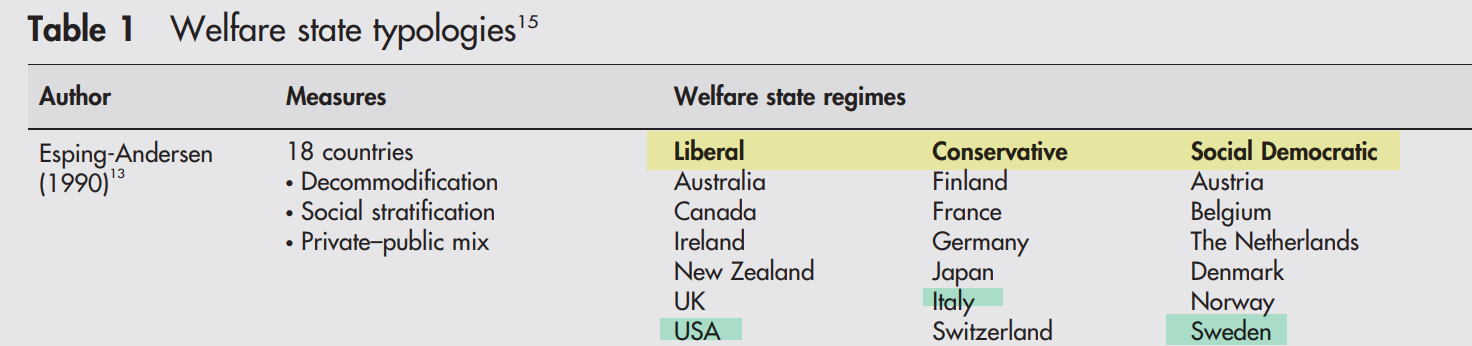


In [30]:
# check countries
df.country.unique()

array(['AUS', 'CAN', 'IRL', 'NZL', 'GBR', 'USA', 'FIN', 'FRA', 'DEU',
       'JPN', 'ITA', 'CHE', 'AUT', 'BEL', 'NLD', 'DNK', 'NOR', 'SWE'],
      dtype=object)

the 18 countries: AUS, CAN, IRL, NZL, GBR, USA, FIN, FRA, DEU, JPN, ITA, CHE, AUT, BEL, NLD, DNK, NOR, SWE


liberal: AUS, CAN, IRL, NZL, GBR(UK), USA

conservative: FIN, FRA, DEU(Germany), JPN, ITA, CHE (Switzerland)

social democratic: AUT (Austria), BEL, NLD, DNK, NOR, SWE
 

In [31]:
# create new column
## liberal: group 1, conservative: 2, social demo: 3

## create a dict

welf_dict = {'AUS': 1, 'CAN': 1, 'IRL': 1, 'NZL':1, 'GBR':1, 'USA':1,
             'FIN': 2, 'FRA': 2, 'DEU': 2, 'JPN': 2, 'ITA': 2, 'CHE': 2,
             'AUT': 3, 'BEL': 3, 'NLD': 3, 'DNK': 3, 'NOR': 3, 'SWE': 3}

df['welfare'] = df['country'].map(welf_dict)


In [32]:
df.head()

,country,year,f_lfpr,f_unemp,m_lfpr,m_unemp,fambnft,fert,inequal,percap,socialbnft,unempbnft,l_percap,gap_lfpr,gap_unemp,welfare
0,AUS,1999,69.37843,5.309353,90.42914,5.573053,2.672,1.76,0.156,27139.248201,7.746466,0.987,10.208736,21.05071,-0.263700,1
1,AUS,2000,70.46004,4.918147,90.22377,5.147348,2.901,1.76,0.151,28312.866541,8.247041,0.925,10.251072,19.76373,-0.229201,1
2,AUS,2001,71.11716,5.174150,90.13721,5.406565,2.941,1.73,0.150,29546.381986,8.046860,0.884,10.293717,19.02005,-0.232415,1
3,AUS,2002,71.56216,5.008964,90.17905,5.064114,2.789,1.77,0.144,30807.514079,7.801852,0.771,10.335514,18.61689,-0.055150,1
4,AUS,2003,72.49166,4.872567,89.84454,4.582355,3.191,1.77,0.140,32391.469994,8.209398,0.698,10.385650,17.35288,0.290212,1


In [33]:
df.tail()

,country,year,f_lfpr,f_unemp,m_lfpr,m_unemp,fambnft,fert,inequal,percap,socialbnft,unempbnft,l_percap,gap_lfpr,gap_unemp,welfare
327,SWE,2015,87.550,6.030550,93.225,6.113972,3.457,1.85,0.039,49103.131953,13.169228,0.327,10.801678,5.675,-0.083422,3
328,SWE,2016,87.625,5.575603,93.175,5.889241,3.495,1.85,0.038,50430.250790,13.091346,0.323,10.828346,5.550,-0.313638,3
329,SWE,2017,87.925,5.462243,93.475,5.782122,3.384,1.78,0.035,51947.955780,12.788627,0.300,10.857998,5.550,-0.319879,3
330,SWE,2018,88.050,5.523660,93.450,5.377121,3.464,1.75,0.031,53521.635778,12.572836,0.299,10.887841,5.400,0.146539,3
331,SWE,2019,87.850,5.884260,93.575,5.359640,3.421,1.70,0.024,56404.032355,12.272332,0.325,10.940296,5.725,0.524620,3


# analysis

## explore

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 331
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     332 non-null    object 
 1   year        332 non-null    int64  
 2   f_lfpr      332 non-null    float64
 3   f_unemp     332 non-null    float64
 4   m_lfpr      332 non-null    float64
 5   m_unemp     332 non-null    float64
 6   fambnft     332 non-null    float64
 7   fert        332 non-null    float64
 8   inequal     332 non-null    float64
 9   percap      332 non-null    float64
 10  socialbnft  332 non-null    float64
 11  unempbnft   332 non-null    float64
 12  l_percap    332 non-null    float64
 13  gap_lfpr    332 non-null    float64
 14  gap_unemp   332 non-null    float64
 15  welfare     332 non-null    int64  
dtypes: float64(13), int64(2), object(1)
memory usage: 44.1+ KB


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,332.0,2009.566265,5.800704,1999.000000,2005.000000,2010.000000,2015.000000,2019.000000
f_lfpr,332.0,78.871281,6.080130,57.075000,75.561475,80.358335,83.600000,88.050000
f_unemp,332.0,5.513239,2.192619,1.800000,3.974320,5.022174,6.477205,13.241040
m_lfpr,332.0,91.588521,1.892940,87.050000,90.348075,91.425000,92.581250,96.376560
m_unemp,332.0,5.198907,2.201096,1.375000,3.700000,4.643237,6.354167,16.149950
fambnft,332.0,2.375235,0.900630,0.619000,1.503250,2.660500,3.029750,4.060000
fert,332.0,1.709428,0.218969,1.230000,1.520000,1.740000,1.872500,2.190000
inequal,332.0,0.110660,0.058057,0.016000,0.062750,0.101000,0.142250,0.277000
percap,332.0,42157.422025,10848.215255,20537.595625,34419.644781,40909.232084,47913.277300,89846.272208
socialbnft,332.0,13.526362,3.623081,6.505659,10.278369,13.757264,16.455667,20.111336


## DVs

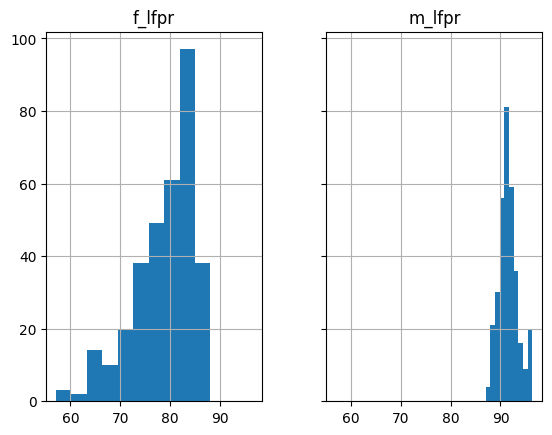

In [36]:
# check DVs histograms

## labor force
df.hist(column=["f_lfpr",  "m_lfpr"], bins = 10, sharey= True, sharex= True);


## female labor force participartion rate and employment/population rate both concentrate around 70
## female unemployment rate concentrate 4-5

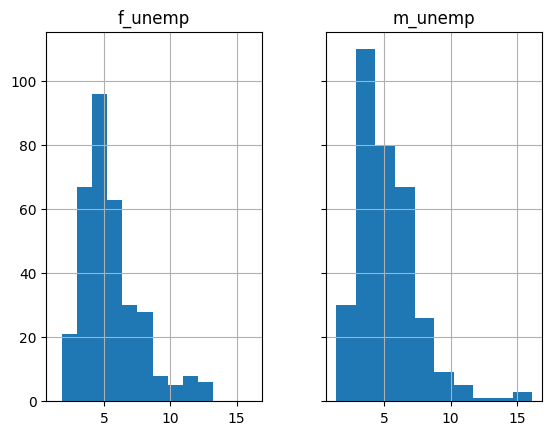

In [37]:
df.hist(column=["f_unemp",  "m_unemp"], bins = 10, sharey= True, sharex= True);

array([[<Axes: title={'center': 'gap_unemp'}>]], dtype=object)

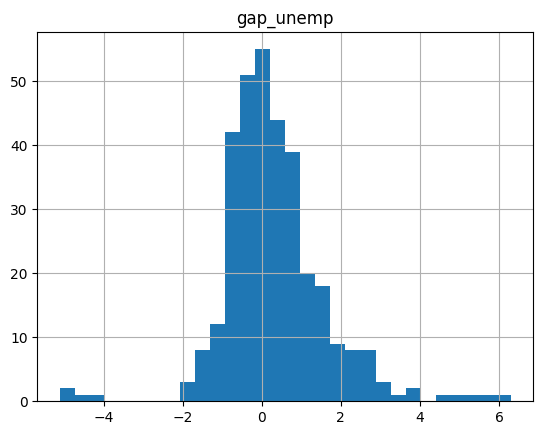

In [38]:
# gap distribution
df.hist("gap_unemp", bins = 30, sharey= True, sharex= True)

array([[<Axes: title={'center': 'gap_lfpr'}>]], dtype=object)

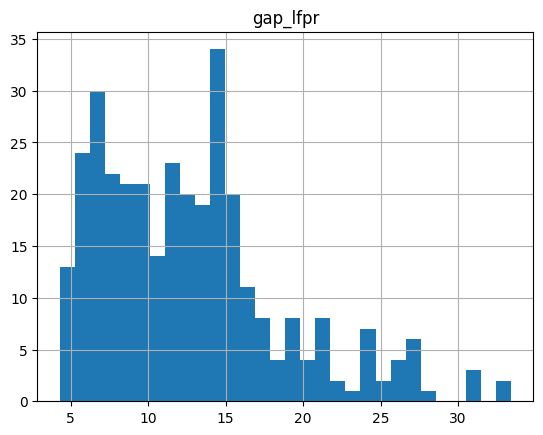

In [39]:
df.hist("gap_lfpr", bins = 30, sharey= True, sharex= True)

In [40]:
# arfi question: 1-unemp
# do plots and correlation that with labor force participation
# lfpr and unemp

In [41]:
#a = 1-df["unemp"]/100
#plt.plot(a)

In [42]:
#b=df["emprat"]/100
#plt.plot(df["emprat"]/100)

In [43]:
#a.corr(b)

In [44]:
# check correlation between lfpr and unemp

#col1, col2 = "lfpr", "unemp"
#corr = df[col1].corr(df[col2])
#corr

## labor force participation and unemployment have strong correlation
## they are all indicators to measure different sides of women's economic status
## but cannot use system regression models SUR

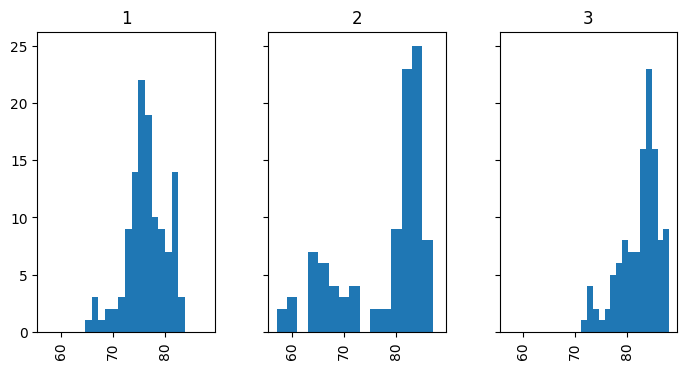

In [45]:
# by welfare regime

# female
df.hist(by = 'welfare', column=("f_lfpr"), bins = 15, layout= (1,3), figsize=(8,4), sharey=True, sharex=True);

# only 1 liberal's lfpr concentration is around 75, lower than 2 and 3.

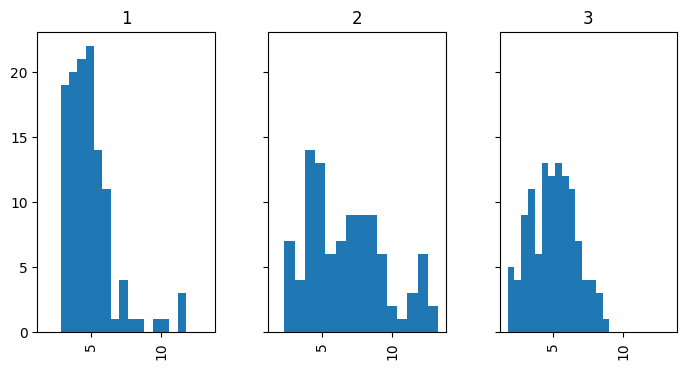

In [46]:
df.hist(by = 'welfare', column=("f_unemp"), bins = 15, layout= (1,3), figsize=(8,4), sharey=True, sharex=True);

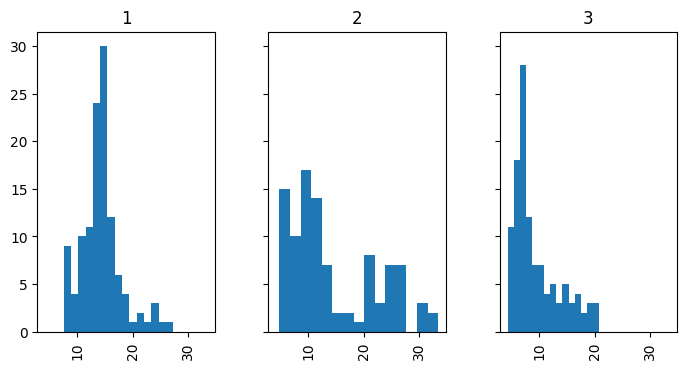

In [47]:
df.hist(by = 'welfare', column=("gap_lfpr"), bins = 15, layout= (1,3), figsize=(8,4), sharey=True, sharex=True);

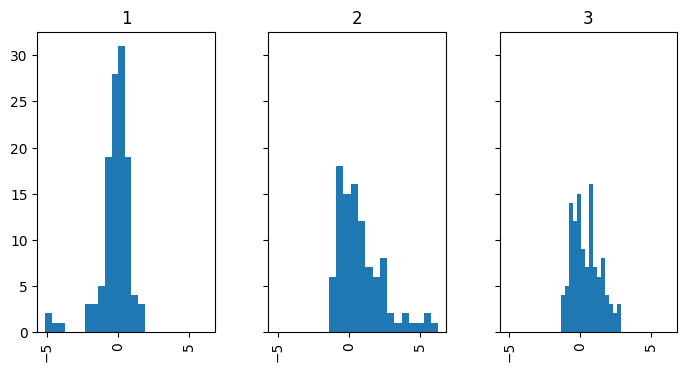

In [48]:
df.hist(by = 'welfare', column=("gap_unemp"), bins = 15, layout= (1,3), figsize=(8,4), sharey=True, sharex=True);

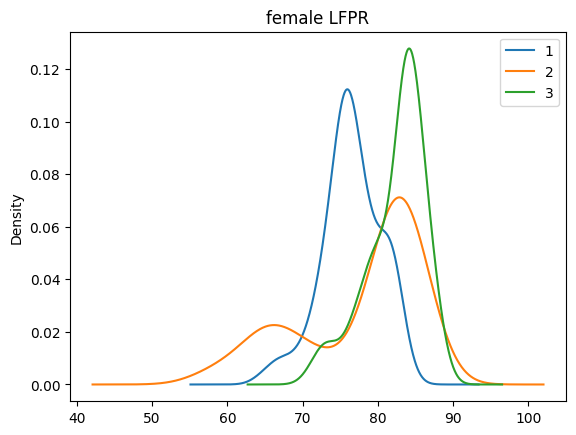

In [49]:
df.groupby('welfare')['f_lfpr'].plot(kind='kde',legend=True, title = 'female LFPR'); # ‘kde’ : Kernel Density Estimation plot

# liberal 1 welfare state's lfpr indeed concentrates 70-75

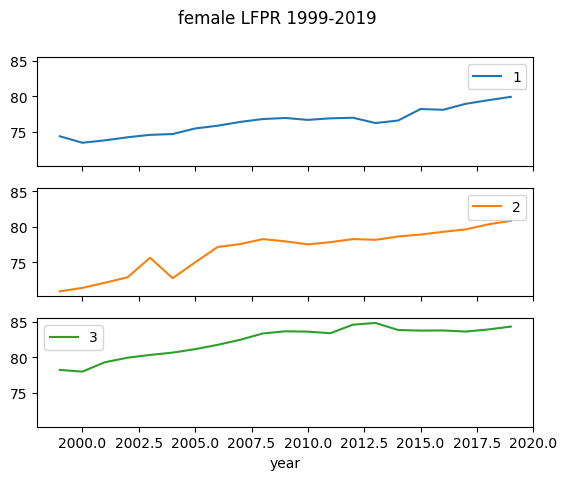

In [50]:
pd.pivot_table(df.reset_index(),
               index='year', columns='welfare', values='f_lfpr'
              ).plot(subplots=True,sharey=True, sharex=True, title = 'female LFPR 1999-2019');

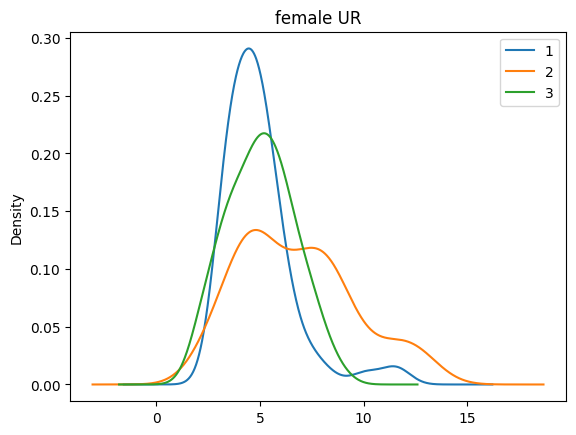

In [51]:
df.groupby('welfare')['f_unemp'].plot(kind='kde',legend=True, title = 'female UR'); 

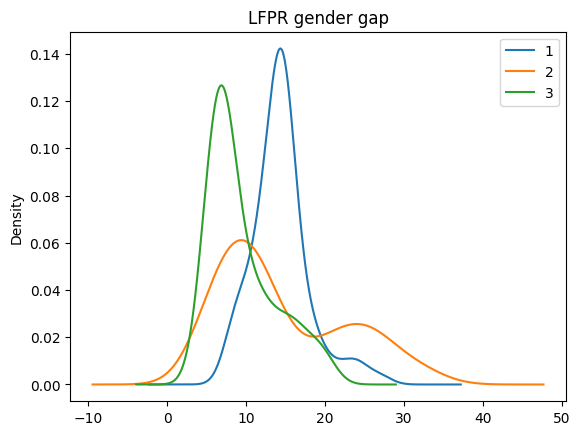

In [52]:
df.groupby('welfare')['gap_lfpr'].plot(kind='kde',legend=True, title = 'LFPR gender gap'); 

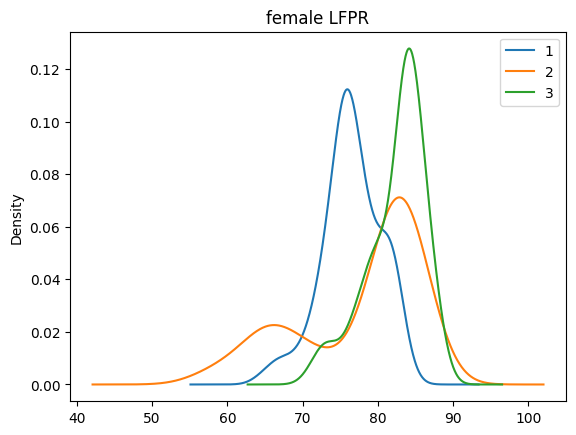

In [53]:
df.groupby('welfare')['f_lfpr'].plot(kind='kde',legend=True, title = 'female LFPR'); 

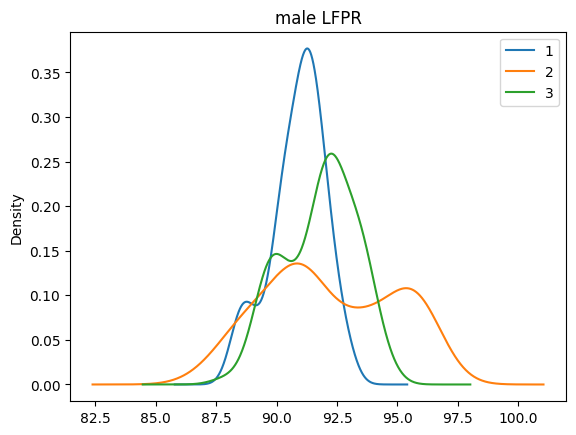

In [54]:
df.groupby('welfare')['m_lfpr'].plot(kind='kde',legend=True, title = 'male LFPR'); 

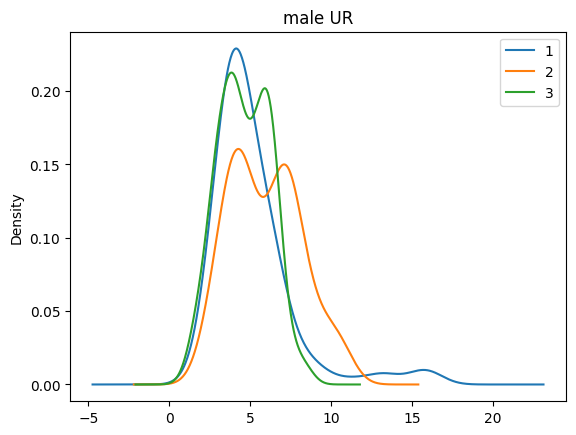

In [55]:
df.groupby('welfare')['m_unemp'].plot(kind='kde',legend=True, title = 'male UR'); 

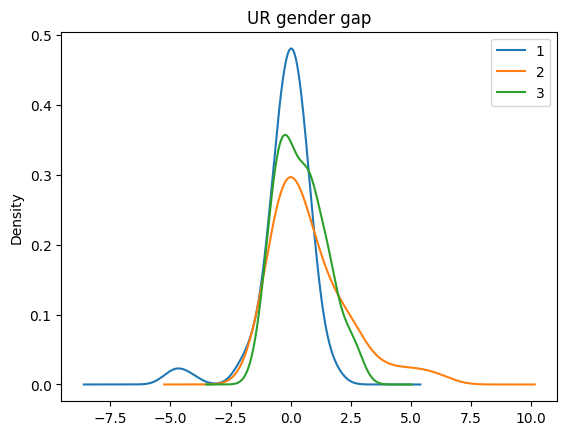

In [56]:
df.groupby('welfare')['gap_unemp'].plot(kind='kde',legend=True, title = 'UR gender gap'); 

In [57]:
pd.pivot_table(df,
               index= ['welfare'],
              columns=['year'],
               values = 'f_lfpr',
               aggfunc = 'mean',
              margins=True,
              margins_name='mean')

year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,mean
welfare,,,,,,,,,,,,,,,,,,,,,
1,74.38313,73.475628,73.815627,74.244100,74.586664,74.701622,75.483842,75.872350,76.406865,76.806972,...,76.907942,76.991967,76.247044,76.597472,78.220606,78.109132,78.951263,79.459430,79.926050,76.473598
2,70.92500,71.412500,72.137500,72.900000,75.650000,72.775000,74.999226,77.159850,77.569542,78.266777,...,77.842055,78.271977,78.168750,78.637500,78.905830,79.299553,79.633725,80.345503,80.830947,77.664612
3,78.21250,77.985000,79.300000,79.933333,80.325000,80.650000,81.141667,81.745833,82.458333,83.341667,...,83.379167,84.580000,84.820000,83.829167,83.745000,83.765000,83.612500,83.905000,84.310000,82.380652
mean,74.47594,74.892598,75.926340,76.663115,77.273809,76.975695,77.338187,78.259344,78.811580,79.471805,...,79.376388,79.675509,79.857873,80.034157,80.203938,80.192771,80.732496,81.079682,81.534822,78.871281


## IVs

In [58]:
# pivot table for IV: public spending on family benefits
pd.pivot_table(df,
               index= ['welfare'],
              columns=['year'],
               values = 'fambnft',
               aggfunc = 'mean',
              margins=True,
              margins_name='mean')

year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,mean
welfare,,,,,,,,,,,,,,,,,,,,,
1,1.786250,1.938167,2.007167,1.952400,2.099000,2.088333,2.142500,2.197000,2.247833,2.541500,...,2.529833,2.520500,2.588600,2.480600,2.211400,2.115333,2.011833,1.970500,1.903000,2.223202
2,2.147000,2.049500,2.017500,1.958000,2.328000,2.110500,1.669400,1.801833,1.784000,1.813833,...,2.008833,2.044333,2.090000,2.095250,2.137167,2.133000,2.131000,2.129333,2.153333,2.016204
3,3.081000,2.643400,2.724167,2.774000,2.853333,2.798500,2.738167,2.745833,2.686500,2.764833,...,2.910500,2.876000,2.869200,2.843667,3.136000,3.150800,2.811167,2.720200,2.718600,2.838513
mean,2.200125,2.226538,2.315929,2.332462,2.471357,2.395857,2.213588,2.248222,2.239444,2.373389,...,2.483056,2.457000,2.546357,2.523067,2.472500,2.426118,2.318000,2.247059,2.231235,2.375235


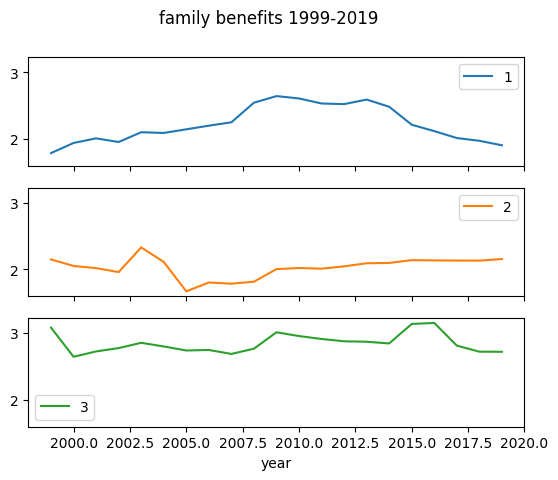

In [59]:
pd.pivot_table(df.reset_index(),
               index='year', columns='welfare', values='fambnft'
              ).plot(subplots=True,sharey=True, sharex=True, title = 'family benefits 1999-2019');

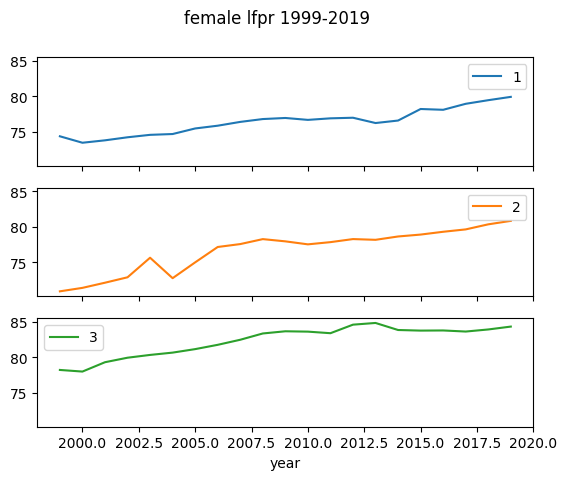

In [60]:
pd.pivot_table(df.reset_index(),
               index='year', columns='welfare', values='f_lfpr'
              ).plot(subplots=True,sharey=True, sharex=True, title = 'female lfpr 1999-2019');

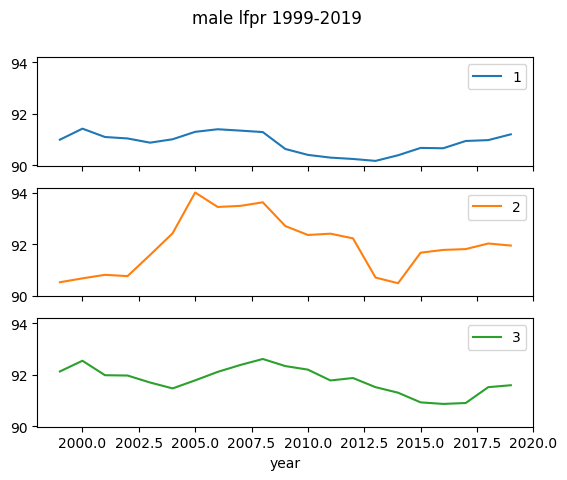

In [61]:
pd.pivot_table(df.reset_index(),
               index='year', columns='welfare', values='m_lfpr'
              ).plot(subplots=True,sharey=True, sharex=True, title = 'male lfpr 1999-2019');

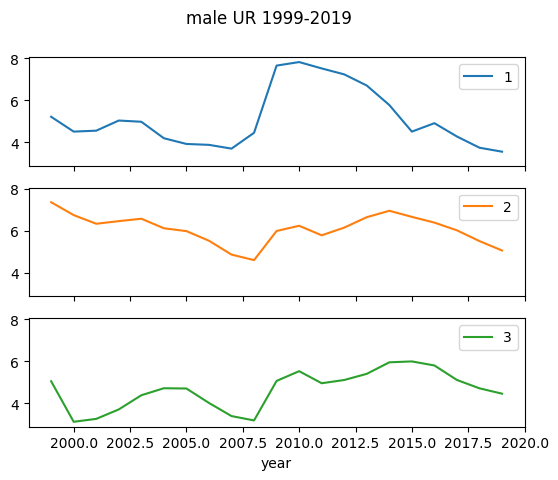

In [62]:
pd.pivot_table(df.reset_index(),
               index='year', columns='welfare', values='m_unemp'
              ).plot(subplots=True,sharey=True, sharex=True, title = 'male UR 1999-2019');

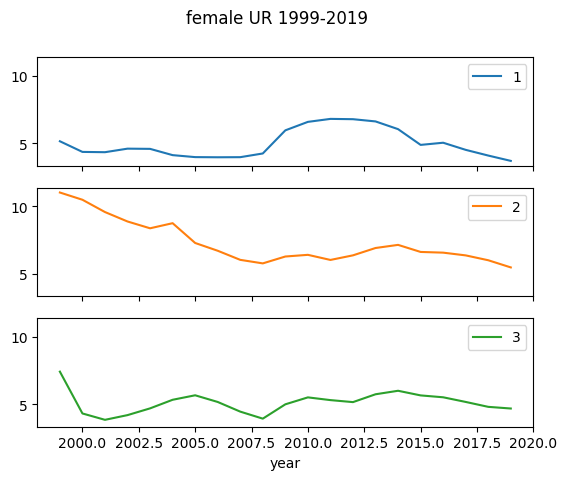

In [63]:
pd.pivot_table(df.reset_index(),
               index='year', columns='welfare', values='f_unemp'
              ).plot(subplots=True,sharey=True, sharex=True, title = 'female UR 1999-2019');

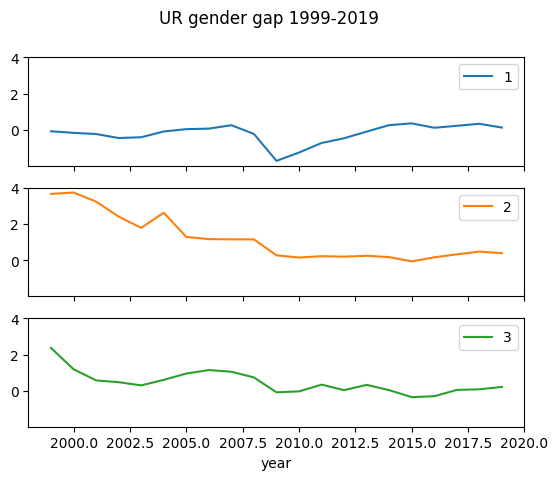

In [64]:
pd.pivot_table(df.reset_index(),
               index='year', columns='welfare', values='gap_unemp'
              ).plot(subplots=True,sharey=True, sharex=True, title = 'UR gender gap 1999-2019');

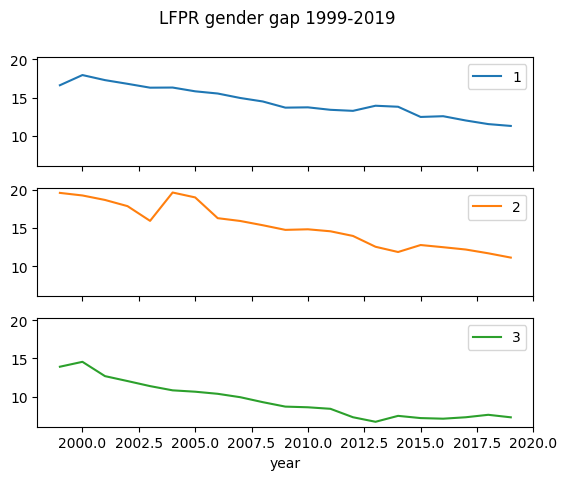

In [65]:
pd.pivot_table(df.reset_index(),
               index='year', columns='welfare', values='gap_lfpr'
              ).plot(subplots=True,sharey=True, sharex=True, title = 'LFPR gender gap 1999-2019');

welfare
1    Axes(0.125,0.11;0.775x0.77)
2    Axes(0.125,0.11;0.775x0.77)
3    Axes(0.125,0.11;0.775x0.77)
Name: fambnft, dtype: object

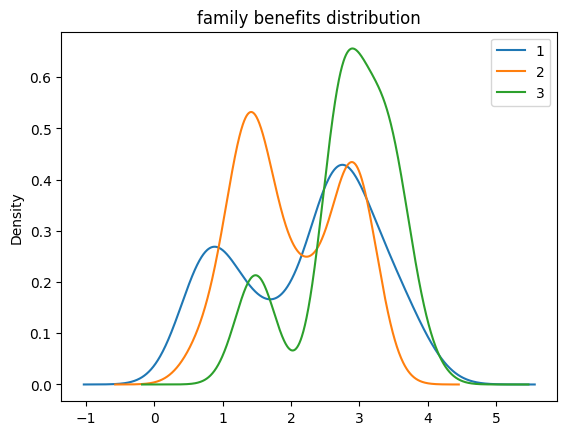

In [66]:
df.groupby('welfare')['fambnft'].plot(kind='kde',legend=True, title = 'family benefits distribution')

welfare
1    Axes(0.125,0.11;0.775x0.77)
2    Axes(0.125,0.11;0.775x0.77)
3    Axes(0.125,0.11;0.775x0.77)
Name: fert, dtype: object

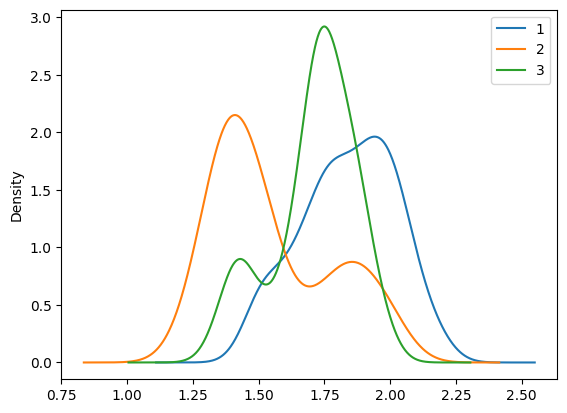

In [67]:
df.groupby('welfare')['fert'].plot(kind='kde',legend=True)

# 1 liberal state has 1.8 fertility rate; 2 conservative state has around 1.4 fertility rate; 3 social democratic state has 1.9 fertility rate

## DV and main IV

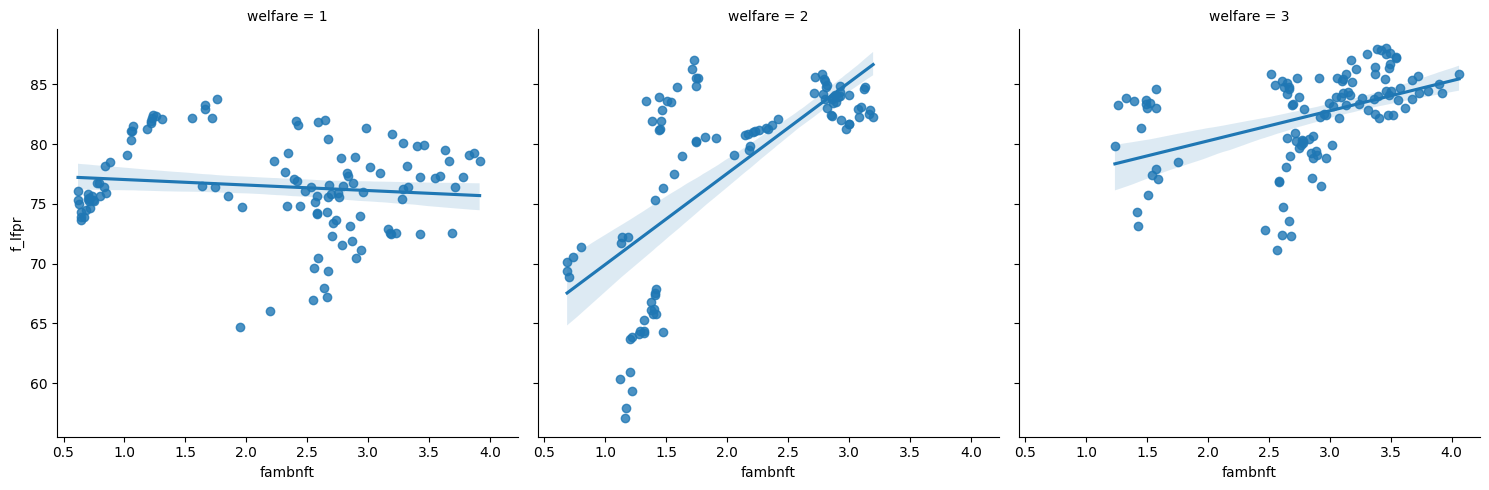

In [68]:
## sns linear model plot
# DV: female_labor force participation rate, IV: spending on family benefit 

sns.lmplot(data = df,x='fambnft',y= 'f_lfpr',
          col= 'welfare')
plt.tight_layout();
#plt.title(label='relashitionps between female LFPR and family benefit', loc='center');

## liberal (1) welfare state: negative relationship, but conservative (2) and social democratic (3) are positive

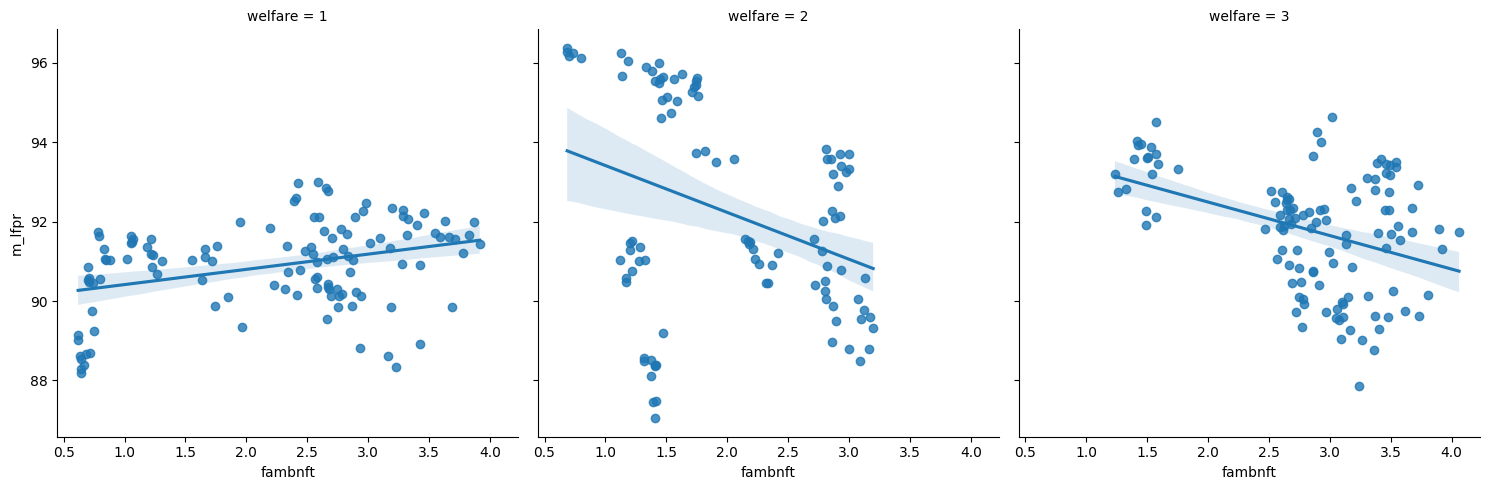

In [69]:
sns.lmplot(data = df,x='fambnft',y= 'm_lfpr',
          col= 'welfare')
plt.tight_layout();

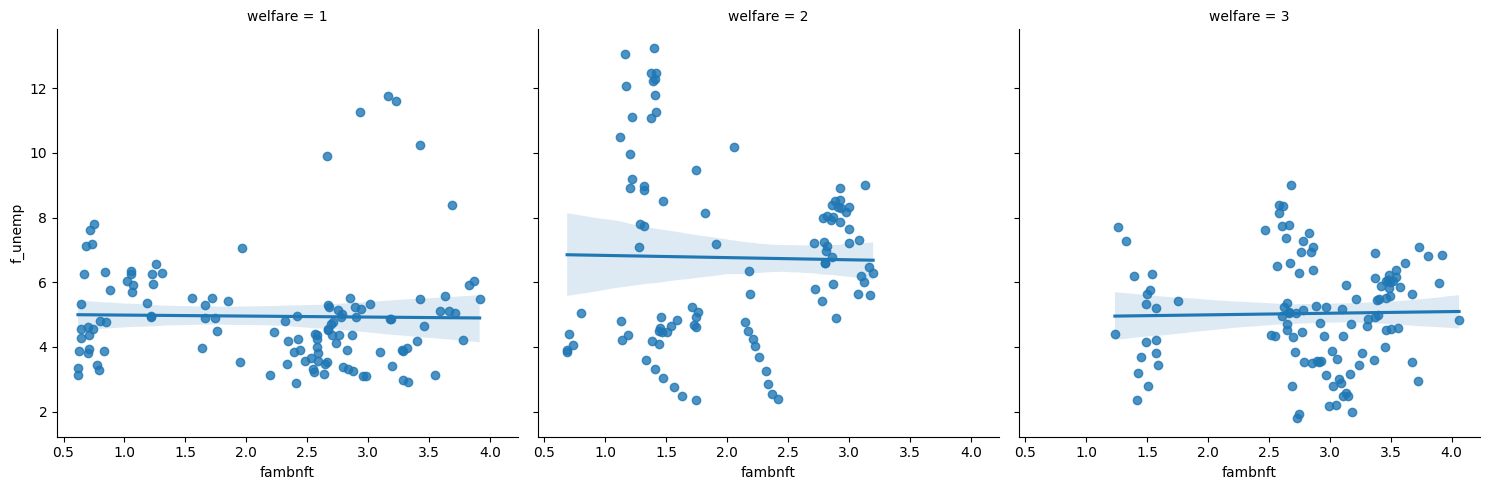

In [70]:
sns.lmplot(data = df,x='fambnft',y= 'f_unemp',
          col= 'welfare')
plt.tight_layout();


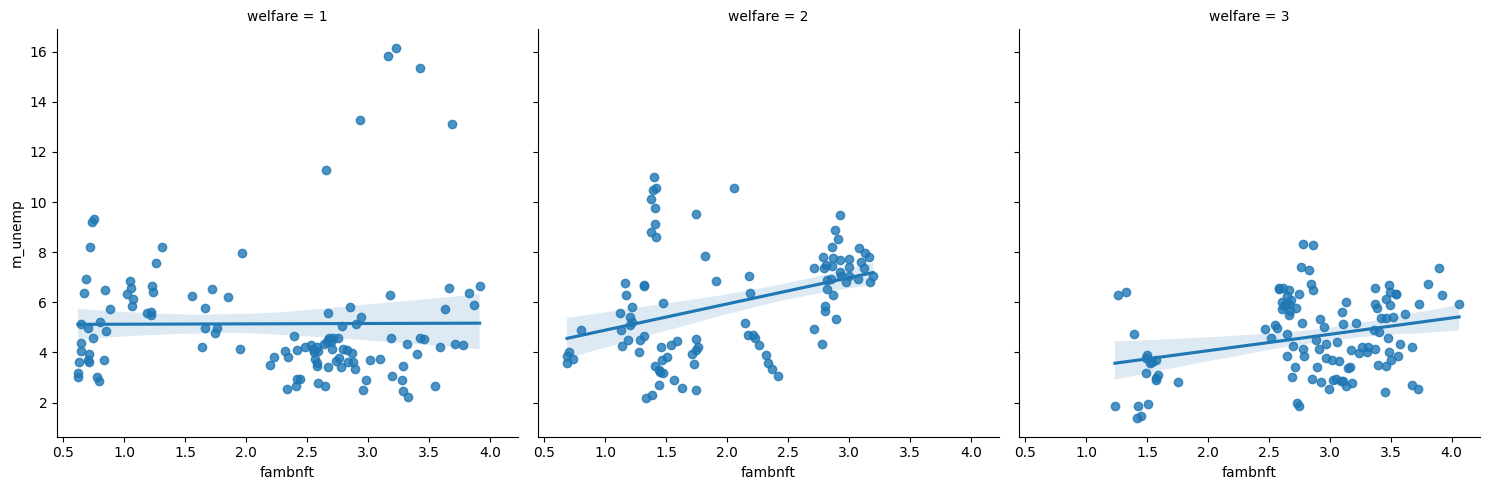

In [71]:
sns.lmplot(data = df,x='fambnft',y= 'm_unemp',
          col= 'welfare')
plt.tight_layout();

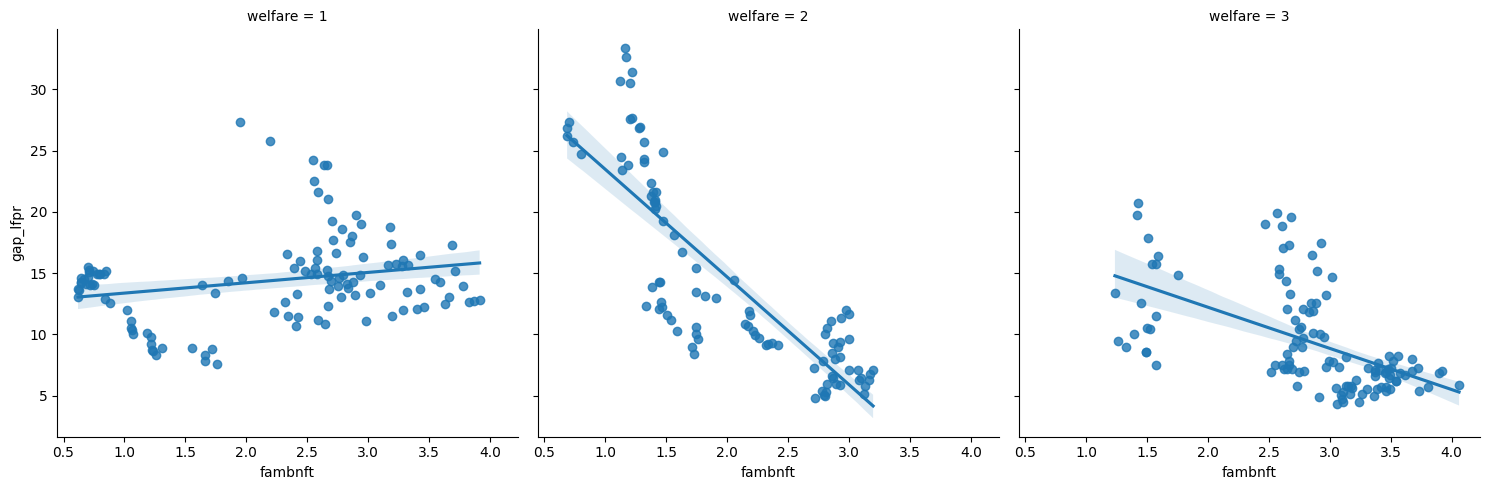

In [72]:
sns.lmplot(data = df,x='fambnft',y= 'gap_lfpr',
          col= 'welfare')
plt.tight_layout();


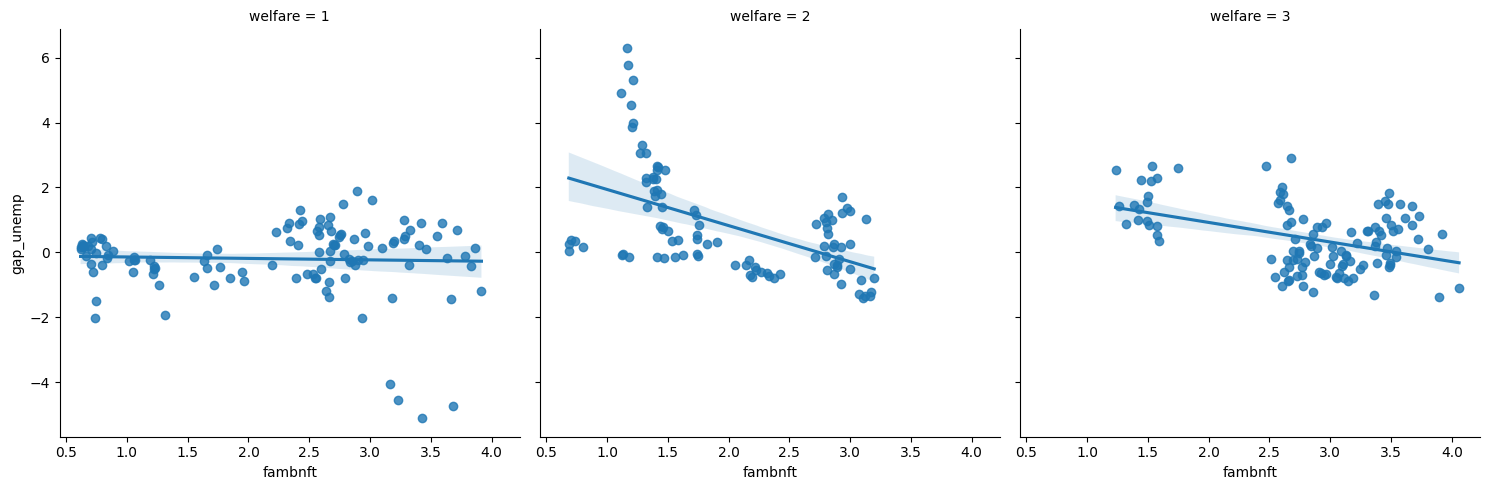

In [73]:
sns.lmplot(data = df,x='fambnft',y= 'gap_unemp',
          col= 'welfare')
plt.tight_layout();

## check VIF for IVs

In [74]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
# check collinearity between IVs

# female labor force participation rate

y, X = dmatrices('f_lfpr ~ fambnft + socialbnft + fert + inequal + l_percap + unempbnft', 
                 data = df, 
                 return_type='dataframe') 

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
vif

# all VIFs are between 1-3, that means moderate correlation, but no need special attention. 

,VIF,variable
0,2926.860845,Intercept
1,2.344216,fambnft
2,1.477295,socialbnft
3,2.231639,fert
4,2.365266,inequal
5,1.583819,l_percap
6,1.225795,unempbnft


In [76]:
# male labor force participation rate

y, X = dmatrices('m_lfpr ~ fambnft + socialbnft + fert + inequal + l_percap + unempbnft', 
                 data = df, 
                 return_type='dataframe') 

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
vif


,VIF,variable
0,2926.860845,Intercept
1,2.344216,fambnft
2,1.477295,socialbnft
3,2.231639,fert
4,2.365266,inequal
5,1.583819,l_percap
6,1.225795,unempbnft


In [77]:
# female unemployment

y, X = dmatrices('f_unemp ~ fambnft + fert + inequal + l_percap + socialbnft + unempbnft', 
                 data = df, 
                 return_type='dataframe') 

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
vif

,VIF,variable
0,2926.860845,Intercept
1,2.344216,fambnft
2,2.231639,fert
3,2.365266,inequal
4,1.583819,l_percap
5,1.477295,socialbnft
6,1.225795,unempbnft


In [78]:
# male unemployment

y, X = dmatrices('m_unemp ~ fambnft + fert + inequal + l_percap + socialbnft + unempbnft', 
                 data = df, 
                 return_type='dataframe') 

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
vif

,VIF,variable
0,2926.860845,Intercept
1,2.344216,fambnft
2,2.231639,fert
3,2.365266,inequal
4,1.583819,l_percap
5,1.477295,socialbnft
6,1.225795,unempbnft


In [79]:
# gender gap labor force participation rate

y, X = dmatrices('gap_lfpr ~ fambnft + fert + inequal + l_percap + socialbnft + unempbnft', 
                 data = df, 
                 return_type='dataframe') 

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
vif

,VIF,variable
0,2926.860845,Intercept
1,2.344216,fambnft
2,2.231639,fert
3,2.365266,inequal
4,1.583819,l_percap
5,1.477295,socialbnft
6,1.225795,unempbnft


In [80]:
# gap unemployment
y, X = dmatrices('gap_unemp ~ fambnft + fert + inequal + l_percap + socialbnft + unempbnft', 
                 data = df, 
                 return_type='dataframe') 

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
vif

,VIF,variable
0,2926.860845,Intercept
1,2.344216,fambnft
2,2.231639,fert
3,2.365266,inequal
4,1.583819,l_percap
5,1.477295,socialbnft
6,1.225795,unempbnft


## OLS

In [81]:
# OLS
m0 = smf.ols('f_lfpr ~ fambnft + fert + inequal + l_percap + socialbnft + unempbnft', 
                 data = df)
res0 = m0.fit()
print(res0.summary())

                            OLS Regression Results                            
Dep. Variable:                 f_lfpr   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     54.95
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           1.30e-46
Time:                        01:13:48   Log-Likelihood:                -953.60
No. Observations:                 332   AIC:                             1921.
Df Residuals:                     325   BIC:                             1948.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.6155     12.836      2.619      0.0

Notes for variables:

gender inequality index (GII): 

https://hdr.undp.org/data-center/thematic-composite-indices/gender-inequality-index#/indicies/GII

GII is a composite metric of gender inequality using three dimensions: reproductive health, empowerment and the labour market. A low GII value indicates low inequality between women and men, and vice-versa.

the lower GII values represent a better performance regarding gender inequality.




Explain the OLS table:

gender inequality index is negatively correlated to female labor force participation

government spending on family benefits, education, GDP per capita are positively correlated to flfpr.

contrary to my expectation, fertility rate is positively correlated to flfpr.

spending on social benefits is not statistically significant.

## two-level model

In [82]:
# has group level, but no IVS,

m1 = smf.mixedlm(
    "f_lfpr ~ 1",
    groups="welfare",
    data=df,
)
res1 = m1.fit()
print(res1.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: f_lfpr    
No. Observations: 332     Method:             REML      
No. Groups:       3       Scale:              30.3746   
Min. group size:  98      Log-Likelihood:     -1041.0909
Max. group size:  119     Converged:          Yes       
Mean group size:  110.7                                 
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept     78.841    1.805 43.672 0.000 75.302 82.379
welfare Var    9.501    1.776                           



In [83]:
# has group level and all IVs
m2 = smf.mixedlm(
    "f_lfpr ~ fambnft + fert + inequal + l_percap + socialbnft + unempbnft",
    groups="welfare",
    data=df,
)
res2 = m2.fit()
print(res2.summary())

          Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: f_lfpr   
No. Observations:   332     Method:             REML     
No. Groups:         3       Scale:              18.6005  
Min. group size:    98      Log-Likelihood:     -951.4012
Max. group size:    119     Converged:          Yes      
Mean group size:    110.7                                
---------------------------------------------------------
             Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
---------------------------------------------------------
Intercept    34.539   13.112  2.634 0.008   8.840  60.238
fambnft       0.557    0.423  1.315 0.189  -0.273   1.386
fert          9.234    1.645  5.613 0.000   6.010  12.458
inequal     -61.749    7.106 -8.689 0.000 -75.677 -47.821
l_percap      3.074    1.226  2.507 0.012   0.671   5.477
socialbnft    0.156    0.088  1.765 0.078  -0.017   0.329
unempbnft    -0.791    0.351 -2.253 0.024  -1.478  -0.103
welfare Var   0.234    0

## fixed effects model

In [84]:
### from pandel data notebook
## set index
dt = df.set_index(['welfare','year']) # time should be put in the second, otherwise it is not panel data
dt1 = dt.copy()
dt1.head(15)

country    f_lfpr   f_unemp    m_lfpr   m_unemp  fambnft  fert  \
welfare year                                                                  
1       1999     AUS  69.37843  5.309353  90.42914  5.573053    2.672  1.76   
        2000     AUS  70.46004  4.918147  90.22377  5.147348    2.901  1.76   
        2001     AUS  71.11716  5.174150  90.13721  5.406565    2.941  1.73   
        2002     AUS  71.56216  5.008964  90.17905  5.064114    2.789  1.77   
        2003     AUS  72.49166  4.872567  89.84454  4.582355    3.191  1.77   
        2004     AUS  71.85845  4.365366  89.87328  3.958043    2.868  1.78   
        2005     AUS  73.67624  4.116204  90.31072  3.652769    2.741  1.85   
        2006     AUS  74.21165  3.991931  90.32925  3.441819    2.583  1.88   
        2007     AUS  74.78475  3.907727  90.78320  2.952122    2.440  1.99   
        2008     AUS  75.37837  3.912022  90.93315  2.906200    3.280  2.02   
        2009     AUS  75.54949  4.563570  90.35435  4.510665    2.669  1.97   
        2010     AUS  75.14492  4.397488  90.56267  3.746622    2.562  1.95   
        2011     AUS  75.63547  4.369528  90.59894  3.571423    2.578  1.92   
        2012     AUS  75.56547  4.356940  90.13633  3.795080    2.759  1.93   
        2013     AUS  75.80235  4.697847  90.13663  4.434700    2.699  1.88   

              inequal        percap  socialbnft  unempbnft   l_percap  \
welfare year                                                            
1       1999    0.156  27139.248201    7.746466      0.987  10.208736   
        2000    0.151  28312.866541    8.247041      0.925  10.251072   
        2001    0.150  29546.381986    8.046860      0.884  10.293717   
        2002    0.144  30807.514079    7.801852      0.771  10.335514   
        2003    0.140  32391.469994    8.209398      0.698  10.385650   
        2004    0.136  34000.182318    7.891550      0.619  10.434121   
        2005    0.135  35659.125487    7.618049      0.546  10.481760   
        2006    0.134  37938.792079    7.381437      0.484  10.543729   
        2007    0.134  39687.448610    7.205596      0.408  10.588790   
        2008    0.138  40130.341686    8.756475      0.444  10.599888   
        2009    0.135  41672.936172    7.525669      0.541  10.637607   
        2010    0.136  42816.441745    7.368287      0.502  10.664677   
        2011    0.131  44440.579478    7.433728      0.509  10.701908   
        2012    0.130  43884.635595    7.513645      0.566  10.689320   
        2013    0.123  47763.215900    7.651772      0.642  10.774011   

              gap_lfpr  gap_unemp  
welfare year                       
1       1999  21.05071  -0.263700  
        2000  19.76373  -0.229201  
        2001  19.02005  -0.232415  
        2002  18.61689  -0.055150  
        2003  17.35288   0.290212  
        2004  18.01483   0.407323  
        2005  16.63448   0.463435  
        2006  16.11760   0.550112  
        2007  15.99845   0.955605  
        2008  15.55478   1.005822  
        2009  14.80486   0.052905  
        2010  15.41775   0.650866  
        2011  14.96347   0.798105  
        2012  14.57086   0.561860  
        2013  14.33428   0.263147

In [85]:
# create variables
exog_vars = ['fambnft', 'socialbnft', 'fert', 'inequal', 'l_percap', 'unempbnft']
exog = sm.add_constant(dt1[exog_vars])

### entity effects

In [86]:
# laborforce

## female
fe1 = PanelOLS(dt1.f_lfpr, exog,
               entity_effects=True)
fe1_res = fe1.fit()
print(fe1_res.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 f_lfpr   R-squared:                        0.3979
Estimator:                   PanelOLS   R-squared (Between):              0.9629
No. Observations:                 332   R-squared (Within):               0.3979
Date:                Sat, Apr 29 2023   R-squared (Overall):              0.5021
Time:                        01:13:48   Log-likelihood                   -952.03
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      35.574
Entities:                           3   P-value                           0.0000
Avg Obs:                       110.67   Distribution:                   F(6,323)
Min Obs:                       98.000                                           
Max Obs:                       119.00   F-statistic (robust):             35.574
                            

In [87]:
## male
fe1 = PanelOLS(dt1.m_lfpr, exog,
               entity_effects=True)
fe1_res = fe1.fit()
print(fe1_res.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 m_lfpr   R-squared:                        0.3684
Estimator:                   PanelOLS   R-squared (Between):             -11.646
No. Observations:                 332   R-squared (Within):               0.3684
Date:                Sat, Apr 29 2023   R-squared (Overall):             -0.6863
Time:                        01:13:48   Log-likelihood                   -591.28
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      31.396
Entities:                           3   P-value                           0.0000
Avg Obs:                       110.67   Distribution:                   F(6,323)
Min Obs:                       98.000                                           
Max Obs:                       119.00   F-statistic (robust):             31.396
                            

In [88]:
## gap lfpr
## male
fe1 = PanelOLS(dt1.gap_lfpr, exog,
               entity_effects=True)
fe1_res = fe1.fit()
print(fe1_res.summary)


                          PanelOLS Estimation Summary                           
Dep. Variable:               gap_lfpr   R-squared:                        0.5130
Estimator:                   PanelOLS   R-squared (Between):              0.1617
No. Observations:                 332   R-squared (Within):               0.5130
Date:                Sat, Apr 29 2023   R-squared (Overall):              0.4576
Time:                        01:13:48   Log-likelihood                   -911.40
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      56.717
Entities:                           3   P-value                           0.0000
Avg Obs:                       110.67   Distribution:                   F(6,323)
Min Obs:                       98.000                                           
Max Obs:                       119.00   F-statistic (robust):             56.717
                            

In [89]:
# unemployment

## female
fe1 = PanelOLS(dt1.f_unemp, exog,
               entity_effects=True)
fe1_res = fe1.fit()
print(fe1_res.summary)


                          PanelOLS Estimation Summary                           
Dep. Variable:                f_unemp   R-squared:                        0.4353
Estimator:                   PanelOLS   R-squared (Between):             -1.3902
No. Observations:                 332   R-squared (Within):               0.4353
Date:                Sat, Apr 29 2023   R-squared (Overall):              0.1456
Time:                        01:13:48   Log-likelihood                   -612.08
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      41.501
Entities:                           3   P-value                           0.0000
Avg Obs:                       110.67   Distribution:                   F(6,323)
Min Obs:                       98.000                                           
Max Obs:                       119.00   F-statistic (robust):             41.501
                            

In [90]:
## male
fe1 = PanelOLS(dt1.m_unemp, exog,
               entity_effects=True)
fe1_res = fe1.fit()
print(fe1_res.summary)


                          PanelOLS Estimation Summary                           
Dep. Variable:                m_unemp   R-squared:                        0.5550
Estimator:                   PanelOLS   R-squared (Between):             -10.396
No. Observations:                 332   R-squared (Within):               0.5550
Date:                Sat, Apr 29 2023   R-squared (Overall):             -0.1658
Time:                        01:13:48   Log-likelihood                   -587.99
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      67.150
Entities:                           3   P-value                           0.0000
Avg Obs:                       110.67   Distribution:                   F(6,323)
Min Obs:                       98.000                                           
Max Obs:                       119.00   F-statistic (robust):             67.150
                            

In [91]:
## gap unemp
fe1 = PanelOLS(dt1.gap_unemp, exog,
               entity_effects=True)
fe1_res = fe1.fit()
print(fe1_res.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:              gap_unemp   R-squared:                        0.2734
Estimator:                   PanelOLS   R-squared (Between):             -0.9919
No. Observations:                 332   R-squared (Within):               0.2734
Date:                Sat, Apr 29 2023   R-squared (Overall):              0.1388
Time:                        01:13:48   Log-likelihood                   -489.00
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      20.252
Entities:                           3   P-value                           0.0000
Avg Obs:                       110.67   Distribution:                   F(6,323)
Min Obs:                       98.000                                           
Max Obs:                       119.00   F-statistic (robust):             20.252
                            

### Entity + time effects

#### labor force

##### female

In [92]:
labf = PanelOLS(dt1.f_lfpr, exog, entity_effects=True, 
                       time_effects=True) 
labf_res = labf.fit()
print(labf_res)


                          PanelOLS Estimation Summary                           
Dep. Variable:                 f_lfpr   R-squared:                        0.3357
Estimator:                   PanelOLS   R-squared (Between):              0.7926
No. Observations:                 332   R-squared (Within):               0.3467
Date:                Sat, Apr 29 2023   R-squared (Overall):              0.4298
Time:                        01:13:48   Log-likelihood                   -946.85
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      25.516
Entities:                           3   P-value                           0.0000
Avg Obs:                       110.67   Distribution:                   F(6,303)
Min Obs:                       98.000                                           
Max Obs:                       119.00   F-statistic (robust):             25.516
                            

In [93]:
#print(labf_res.summary().as_latex()) # only for statsmodel

In [94]:
#for table in labf_res.summary().tables:
#    print(table.as_latex_tabular())

##### male 

In [95]:
labm = PanelOLS(dt1.m_lfpr, exog, entity_effects=True, 
                       time_effects=True) 
labm_res = labm.fit()
print(labm_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 m_lfpr   R-squared:                        0.4211
Estimator:                   PanelOLS   R-squared (Between):             -19.719
No. Observations:                 332   R-squared (Within):               0.1282
Date:                Sat, Apr 29 2023   R-squared (Overall):             -1.6290
Time:                        01:13:48   Log-likelihood                   -564.69
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      36.730
Entities:                           3   P-value                           0.0000
Avg Obs:                       110.67   Distribution:                   F(6,303)
Min Obs:                       98.000                                           
Max Obs:                       119.00   F-statistic (robust):             36.730
                            

##### gender gap 

In [96]:
fe2 = PanelOLS(dt1.gap_lfpr, exog, entity_effects=True, 
                       time_effects=True) 
lgap_res = fe2.fit()
print(lgap_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:               gap_lfpr   R-squared:                        0.4800
Estimator:                   PanelOLS   R-squared (Between):             -1.3384
No. Observations:                 332   R-squared (Within):               0.3582
Date:                Sat, Apr 29 2023   R-squared (Overall):              0.0742
Time:                        01:13:48   Log-likelihood                   -895.29
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      46.619
Entities:                           3   P-value                           0.0000
Avg Obs:                       110.67   Distribution:                   F(6,303)
Min Obs:                       98.000                                           
Max Obs:                       119.00   F-statistic (robust):             46.619
                            

#### unemployment

##### female 

In [97]:
fe2 = PanelOLS(dt1.f_unemp, exog, entity_effects=True, 
                       time_effects=True) 
unempf_res = fe2.fit()
print(unempf_res)


                          PanelOLS Estimation Summary                           
Dep. Variable:                f_unemp   R-squared:                        0.4263
Estimator:                   PanelOLS   R-squared (Between):             -1.2467
No. Observations:                 332   R-squared (Within):               0.4339
Date:                Sat, Apr 29 2023   R-squared (Overall):              0.1664
Time:                        01:13:48   Log-likelihood                   -599.76
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      37.521
Entities:                           3   P-value                           0.0000
Avg Obs:                       110.67   Distribution:                   F(6,303)
Min Obs:                       98.000                                           
Max Obs:                       119.00   F-statistic (robust):             37.521
                            

##### male 

In [98]:
fe2 = PanelOLS(dt1.m_unemp, exog, entity_effects=True, 
                       time_effects=True) 
unempm_res = fe2.fit()
print(unempm_res)


                          PanelOLS Estimation Summary                           
Dep. Variable:                m_unemp   R-squared:                        0.5597
Estimator:                   PanelOLS   R-squared (Between):             -13.893
No. Observations:                 332   R-squared (Within):               0.5190
Date:                Sat, Apr 29 2023   R-squared (Overall):             -0.4279
Time:                        01:13:48   Log-likelihood                   -559.84
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      64.187
Entities:                           3   P-value                           0.0000
Avg Obs:                       110.67   Distribution:                   F(6,303)
Min Obs:                       98.000                                           
Max Obs:                       119.00   F-statistic (robust):             64.187
                            

##### gap unemp

In [99]:
fe2 = PanelOLS(dt1.gap_unemp, exog, entity_effects=True, 
                       time_effects=True) 
gapunemp_res= fe2.fit()
print(gapunemp_res)


                          PanelOLS Estimation Summary                           
Dep. Variable:              gap_unemp   R-squared:                        0.2523
Estimator:                   PanelOLS   R-squared (Between):             -3.6214
No. Observations:                 332   R-squared (Within):               0.1678
Date:                Sat, Apr 29 2023   R-squared (Overall):             -0.2306
Time:                        01:13:48   Log-likelihood                   -469.03
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      17.045
Entities:                           3   P-value                           0.0000
Avg Obs:                       110.67   Distribution:                   F(6,303)
Min Obs:                       98.000                                           
Max Obs:                       119.00   F-statistic (robust):             17.045
                            

In [100]:
from linearmodels.panel import compare
res_comp = compare({"Female LFPR":labf_res, 
               "Male LFPR":labm_res,
               "LFPR Gap": lgap_res,
               "Female UR": unempf_res,
               "Male UR": unempm_res,    
               "UR Gap": gapunemp_res},
              stars = True,
             precision = "std_errors")
table = print(res_comp)

                                                 Model Comparison                                                
                           Female LFPR      Male LFPR       LFPR Gap      Female UR        Male UR         UR Gap
-----------------------------------------------------------------------------------------------------------------
Dep. Variable                   f_lfpr         m_lfpr       gap_lfpr        f_unemp        m_unemp      gap_unemp
Estimator                     PanelOLS       PanelOLS       PanelOLS       PanelOLS       PanelOLS       PanelOLS
No. Observations                   332            332            332            332            332            332
Cov. Est.                   Unadjusted     Unadjusted     Unadjusted     Unadjusted     Unadjusted     Unadjusted
R-squared                       0.3357         0.4211         0.4800         0.4263         0.5597         0.2523
R-Squared (Within)              0.3467         0.1282         0.3582         0.4339     

Note:

https://www.epi.org/newsroom/useful_definitions/

Unemployment Rate

While no single number captures all the nuances in the health of the labor market, the unemployment rate is considered one of the most important economic indicators.

The unemployment rate measures the share of workers in the labor force who do not currently have a job but are actively looking for work. People who have not looked for work in the past four weeks are not included in this measure.  It is important to keep in mind that the rate measures the percent of unemployed job seekers in the labor force—the sum of employed and unemployed persons—and not the entire population.  

There are several reasons the unemployment rate rises or falls. Although a clear reason is a change in the number of job seekers, the unemployment rate may also be affected by a change in the size of the labor force. When workers become discouraged and stop looking for employment, they leave  the labor force. It is common in economic downturns for the labor force to decrease (or increase more slowly than usual) in size as many give up on finding work and are therefore no longer counted as officially unemployed. For that reason, economists often point out that the unemployment rate is misleading and understates the labor market’s weakness. Conversely, during an economic recovery, high unemployment rates can persist despite an increase in jobs as more workers begin looking for work and re-enter the labor market.


Employment-to-Population Ratio

The Employment-to-Population Ratio is a useful, broad-brush measure. It simply shows the number of people currently employed as a share of the total working-age population, which is the number of civilian, non-institutionalized persons, age 16 and over. This measure does not typically  change dramatically from month to month, but even minor changes help  identify which segments of the population are experiencing the most job loss or gain.This ratio also compliments the  unemployment rate in assessing the health of the labor market. The unemployment rate has shortcomings that the employment-to-population ratio does not. As mentioned above, the unemployment rate is affected by the size of the labor force. As the labor market falters, the unemployment rate may actually fall if workers give up looking for work, and as the labor market is recovering, unemployment can rise because more people are entering the labor force as they start to look for work again. The employment-to-population ratio, because it is unaffected by voluntary changes in labor force participation, is a useful indicator of current labor market conditions. Lows in the employment-to- population ratio correspond with economic downturns. The employment-to-population ratio holds clear and discernible implications for the labor market, both among and between segments of the population.

 

Labor Force Participation Rate

The Labor Force Participation Rate shows the number of people in the labor force—defined as the sum of employed and unemployed persons—as a share of the total working-age population, which is the number of civilian, non-institutionalized people, age 16 and over. It is similar to the employment-to-population ratio but different in one important aspect:  it includes the numbers of people  with a job as well as the number actively looking for work.

Month-to-month changes in the employed and unemployed in the labor force  are relatively small compared to the size of the entire working-age population. Although minor changes in the labor force participation rate can be  informative, it is often used to study long-term trends among different segments of the population.  In 1973, for example, women had a 46% participation rate while men were near 80%. In the three and a half decades since, women have seen steadily increasing labor force participation, nearing 60% in 2007. Male labor force participation, on the other hand, has been decreasing, nearing 70% in 2007.

Comparing different segments of the population helps show  where the labor market succeeds or fails in incorporating the working-age population.